# **ASSIGNEMNT-3:**
# **KMeans Clustering on scikit learn**



In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets, metrics, cluster
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report, silhouette_score

In [ ]:
#importing the data set on breast_cancer and creating the dataframe

breast_cancer=datasets.load_breast_cancer()
data=pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

#### Diving into the Dataset

In [ ]:
data.head(5) # first 5 rows of the dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.tail(5) #last 5 rows of the dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
data.info() #checking the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
data.keys()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
data.describe(include = "all") 
# information about summary statistic

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:xlabel='mean radius', ylabel='Count'>

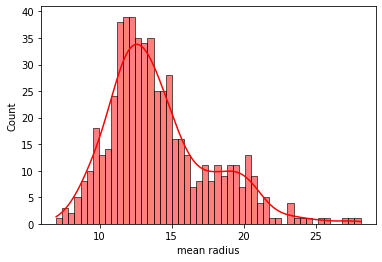

In [ ]:
sns.histplot(data=data, x="mean radius", kde=True, bins=50, color="red")

<AxesSubplot:xlabel='mean texture', ylabel='Count'>

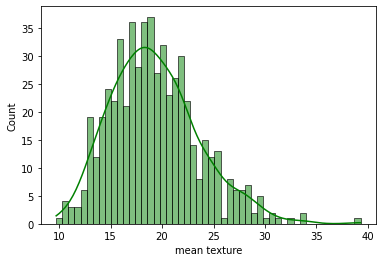

In [ ]:
sns.histplot(data=data, x="mean texture", kde=True, bins=50, color="green")

In [ ]:
list(breast_cancer.target_names)

['malignant', 'benign']

In [ ]:
X = breast_cancer.data[:, 0:2]
 
y = pd.DataFrame(breast_cancer.target)
varriable_names= breast_cancer.feature_names

In [ ]:
X[0:10,]

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       [11.42, 20.38],
       [20.29, 14.34],
       [12.45, 15.7 ],
       [18.25, 19.98],
       [13.71, 20.83],
       [13.  , 21.82],
       [12.46, 24.04]])

In [ ]:
#Building Kmeans model 
n_clusters = 2 # The number of clusters
init = 'random' # Centroids will be assigned in a random way
n_init = 10 # Number of iterations
clusteringKMeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init)
clusteringKMeans.fit(X)

KMeans(init='random', n_clusters=2)

In [ ]:
##Plotting the model output
breast_cancer_df =  pd.DataFrame(breast_cancer.data)
breast_cancer_df = breast_cancer_df.iloc[:, 0:2]# first column of data frame (first_name)  
breast_cancer_df.columns = ['meanRadius','meanTexture']  
y.columns = ["Targets"]

Text(0.5, 1.0, 'Ground Truth Classification')

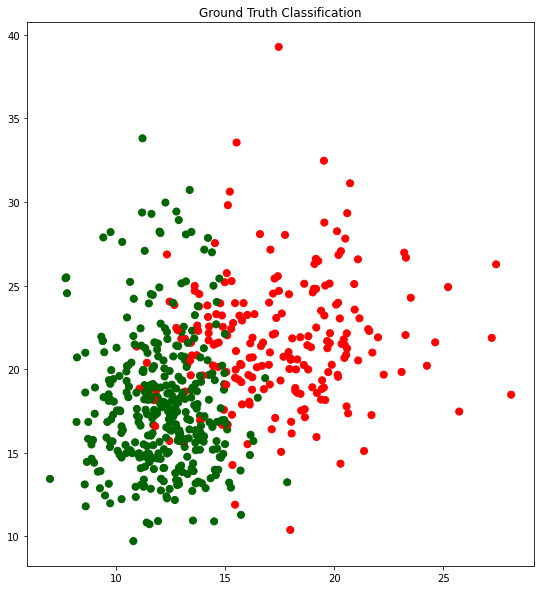

In [ ]:
plt.figure(figsize=(20,10))
color_theme = np.array(['red','darkgreen'])
plt.subplot(1,2,1)
plt.scatter(x=breast_cancer_df.meanRadius, y=breast_cancer_df.meanTexture,c=color_theme[breast_cancer.target],s=50)
plt.title('Ground Truth Classification')

Text(0.5, 1.0, 'K-Means Clustering')

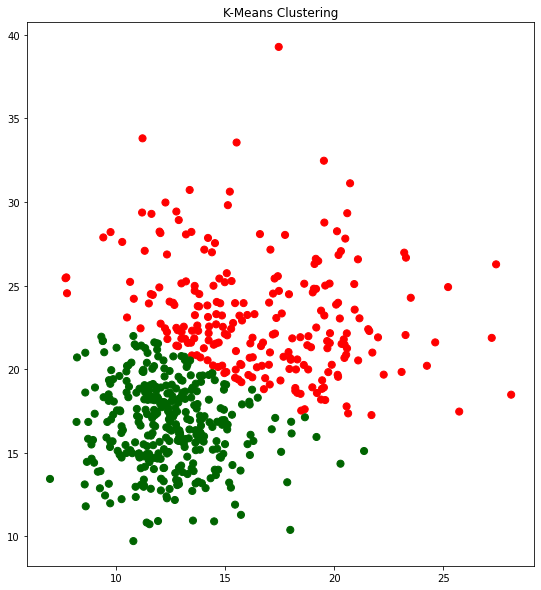

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
plt.scatter(x=breast_cancer_df.meanRadius, y=breast_cancer_df.meanTexture,c=color_theme[clusteringKMeans.labels_],s=50)
plt.title('K-Means Clustering')

In [ ]:
#Evaluate the model
 
print(classification_report(y,clusteringKMeans.labels_))

              precision    recall  f1-score   support

           0       0.76      0.82      0.78       212
           1       0.89      0.84      0.86       357

    accuracy                           0.83       569
   macro avg       0.82      0.83      0.82       569
weighted avg       0.84      0.83      0.83       569



#### Now, finding the optimum number of clusters

## **ELBOW METHOD**

C:\Users\2211592\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


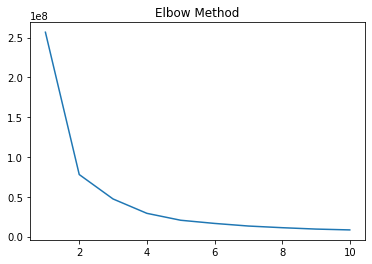

In [ ]:
Centroid_list=[]
no_of_clusters=range(1,11)

for i in no_of_clusters:
  kmeans=cluster.KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
  kmeans.fit(data.values)
  Centroid_list.append(kmeans.inertia_)


plt.plot(no_of_clusters,Centroid_list)
plt.title("Elbow Method")
plt.show()

#### The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

#### Here the elbow method indicates our data has 2 clusters. 

## Training and Predictions

In [ ]:
kmeans=cluster.KMeans(n_clusters=2, init="k-means++", max_iter=300, n_init=10, random_state=0)
Centroid= kmeans.fit_predict(data.values)

In [ ]:
print(Centroid)

#print the centroid values

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


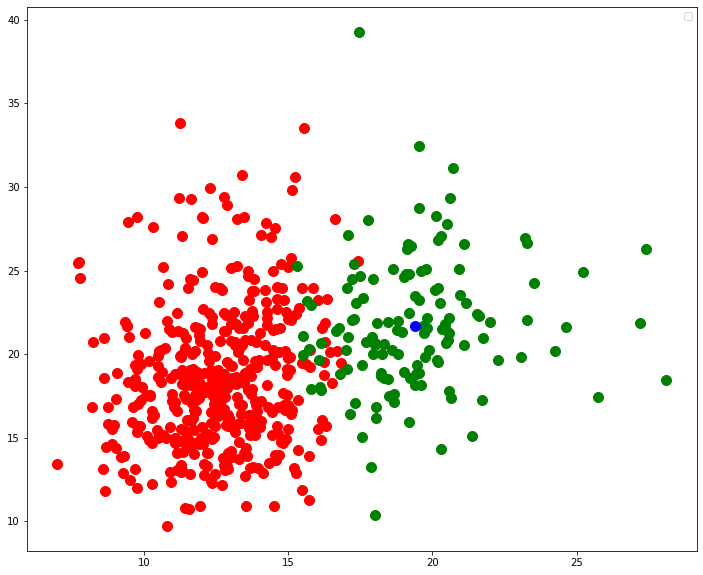

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(data.values[Centroid== 0,0],data.values[Centroid== 0,1], s=100, c="red")
plt.scatter(data.values[Centroid== 1,0],data.values[Centroid== 1,1], s=100, c="green")

plt.scatter(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,1], s=100, c="blue",)
plt.legend()

In [ ]:
print(silhouette_score(data,kmeans.labels_)) # silhouette score is 69%

0.6972646156059464
